In [1]:
exec(open("./autoencoderhelperfunctions.py").read())
df = pd.read_csv("./102520_gazet.csv", index_col = 0)
labels1 = pd.read_csv('./102420_gazetvecs.csv', index_col = 0)
labels2 = labels1[~labels1.text.str.contains('і')].copy()
labels3 = labels2[~labels2.text.str.contains('журналист')].copy()
#labels4 = labels3[~labels3.text.str.contains('стихии')].copy()
#labels = labels4[~labels4.text.str.contains('стихает')].copy()
labels = labels3.dropna()
labels = labels.reset_index(drop = True)

C:\Users\madke\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
og.head()

,0,1,2
0,-0.172373,0.155007,-0.065034
1,-0.308240,0.311033,-0.027513
2,-0.000072,0.211948,-0.506178
3,-0.290286,0.346752,-0.140201
4,-0.394555,0.368516,0.080829


In [3]:
og= df[['0','1','2']]

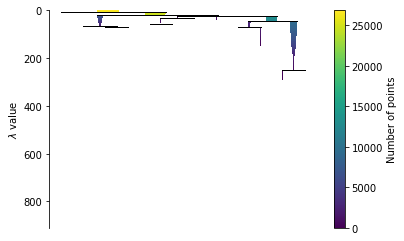

In [8]:
og2 = np.array(og) 
svm_ = return_hdbscansvm(og2, rf = False, svmc= 1000, txt_col = labels['text'], clust_size = 75, samp_size = 75, svmx = False, clust_metric = 'manhattan')

make_graph(og2, svm_[0]['text'], svm_[1], colors = "Inferno", PCA = False)
#X1 = og
%matplotlib inline
svm_[2].condensed_tree_.plot(select_clusters = False)

In [9]:
dice = range(0,12)
for_tatyana = []
for i in dice:
    temp = svm_[0][svm_[0][i] == 1]
    res = temp['text'].sample(n=10, random_state=7)
    res = res.reset_index(drop = True)
    for_tatyana.append(res)
    
    
for j, i in enumerate(for_tatyana):
    print('\n')
    print('TOPIC' + ' ' + str(j) + '\n')
    for n in i:
        print(n)



TOPIC 0

('Преследование Компартии, третирование ее работников и членов, обвинения, без реальных, действительно серьезных, оснований, подозрительность и — вандализм, попрание критериев цивилизованного общества, закрытие газет — внезапный и крутой откат назад, к рубежам далеким и казавшимся пройденными.', 0)
('Сегодня в газетах запрещение оставаться немцам в прибалтийских губерниях.', 0)
('В сегодняшней газете призыв к созданию народного ополчения.', 0)
('По-видимому, отступление итальянцев остановлено; их потери в газетах преувеличены.', 0)
('Но, судя по вызывающему тону крайних газет, победа правительства непрочна; дни Милюкова, Гучкова, князя Львова сочтены.', 0)
('По официальным газетным сообщениям, конференция обсуждала исключительно вопросы по снабжению вооружением.', 0)
('Особенно по вопросам мировой политики газету считают нашим рупором.', 0)
('** **Чемберлен** **попытался,** **продолжает** **газета,** **установить** **сотрудничество** **с** **Германией** **и** **Италией,** **

In [33]:
 svm_[1]

array([15, 21, 18, ..., 16,  6,  9])

In [24]:
df['entry_type'] =  svm_[1]
df.to_csv('./101820_stikhicats.csv')